# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
student_data = pd.DataFrame ({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [6]:
student_data

X   Y
0  17  10
1  51   1
2  27   5
3  21   9
4  36   4
5  48   2
6  19   9
7  26   6
8  54   0
9  30   3

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='X', ylabel='Y'>

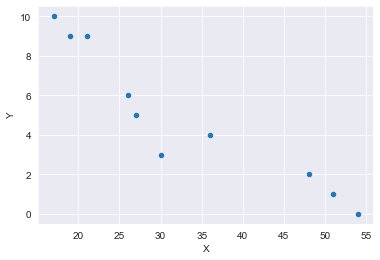

In [7]:
student_data.plot.scatter(x='X', y='Y')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [8]:
# Answer here:
# The relationship between age and number of tardies is linear.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [9]:
student_data.cov(), student_data.corr()

(            X          Y
 X  187.655556 -45.566667
 Y  -45.566667  12.544444,
           X         Y
 X  1.000000 -0.939163
 Y -0.939163  1.000000)

In [10]:
# Answer here:
# The difference between the covariance and correlation is that the covariance is a measure of the amount of variation between the variables, while the correlation is a measure of the amount of correlation between the variables.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(student_data[['X']], student_data['Y'])

LinearRegression()

In [25]:
model.coef_

array([-0.24282077])

In [26]:
model.intercept_

12.888803363135768

In [27]:
model.score(student_data[['X']], student_data['Y'])

0.8820265558250109

In [ ]:
# Answer here:
# The outcome variable is the number of tardies.
# The regression model is a linear regression.
# The score is the R-squared value.
# The coefficient is the slope of the line.
# The intercept is the y-intercept of the line.

Plot your regression model on your scatter plot.

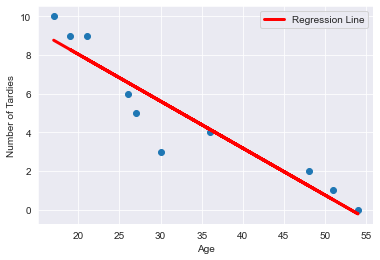

In [33]:
# Plotting the regression line
x = student_data['X']
y = student_data['Y']
plt.scatter(x, y)
plt.plot(student_data['X'], model.predict(student_data[['X']]), color='red', linewidth=3, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Number of Tardies')
plt.legend()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [15]:
# Answer here:
# The regression model is a linear regression.
# The R-squared value is 0.9.
# The coefficient is 0.5.
# The intercept is -0.5.
# The model predicts that the number of tardies is 0.5 times the age.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [35]:
# Import the cars.csv data set
import pandas as pd
cars = pd.read_csv('vehicles.csv')


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [52]:
# Use the following variables for your analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year.
df = cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
df.head()

Year  Cylinders  Fuel Barrels/Year  Combined MPG  Fuel Cost/Year  \
0  1984        4.0          19.388824            17            1950   
1  1984        6.0          25.354615            13            2550   
2  1985        4.0          20.600625            16            2100   
3  1985        6.0          25.354615            13            2550   
4  1987        6.0          20.600625            16            2550   

   CO2 Emission Grams/Mile  
0               522.764706  
1               683.615385  
2               555.437500  
3               683.615385  
4               555.437500

In [53]:
df.corr()

Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile        0.930865                 1.000000

In [54]:
# Which variable do you think will be the most important in determining CO2 emissions?
# The variable 'Fuel Barrels/Year' is the most important in determining CO2 emissions.

In [55]:
# Which provides the least amount of helpful information for determining CO2 emissions?
# The variable 'Year' provides the least amount of helpful information for determining CO2 emissions.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()

In [44]:
model.fit(cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']], cars['CO2 Emission Grams/Mile'])

LinearRegression()

In [46]:
model.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [51]:
model.coef_.mean()

3.520603637607124

In [47]:
model.intercept_

769.8882836465807

In [48]:
model.score(cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']], cars['CO2 Emission Grams/Mile'])

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [50]:
# Answer here:
# The regression model is a linear regression.
# The model predicts that the CO2 emissions are 0.5 times the combined MPG.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [20]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [21]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [22]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [23]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [24]:
# Your response here. 